In [36]:
import pandas as pd
import numpy as np
from random import randrange
from pandas import Series
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.api import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA


In [37]:
df = pd.read_csv('../../dataset/Microsoft_Stock.csv')

# drop everything except for date and open price
df = df.drop(columns=['High', 'Low', 'Close', 'Volume'])
df

,Date,Open
0,4/1/2015 16:00:00,40.60
1,4/2/2015 16:00:00,40.66
2,4/6/2015 16:00:00,40.34
3,4/7/2015 16:00:00,41.61
4,4/8/2015 16:00:00,41.48
...,...,...
1506,3/25/2021 16:00:00,235.30
1507,3/26/2021 16:00:00,231.55
1508,3/29/2021 16:00:00,236.59
1509,3/30/2021 16:00:00,233.53


In [38]:
# Make sure your "Date" column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])
 
# Sorting the data by date (if not sorted)
df = df.sort_values(by='Date')
 
# Resetting the index
df.set_index('Date', inplace=True)


<Figure size 2000x2000 with 0 Axes>

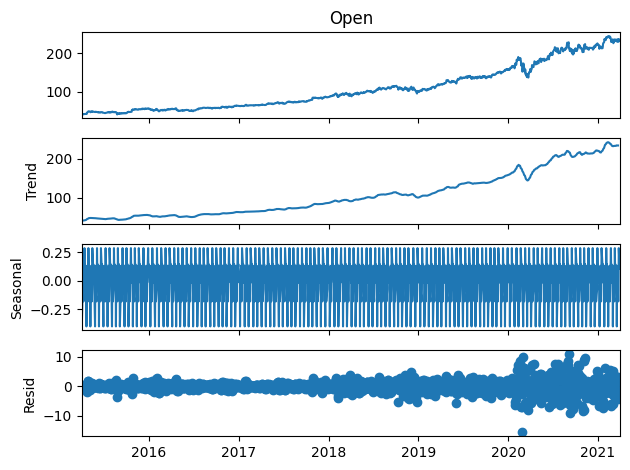

In [39]:
result = seasonal_decompose(df['Open'], model='additive', period=12)
plt.figure(figsize=(20, 20), dpi=100)

result.plot()
plt.show()

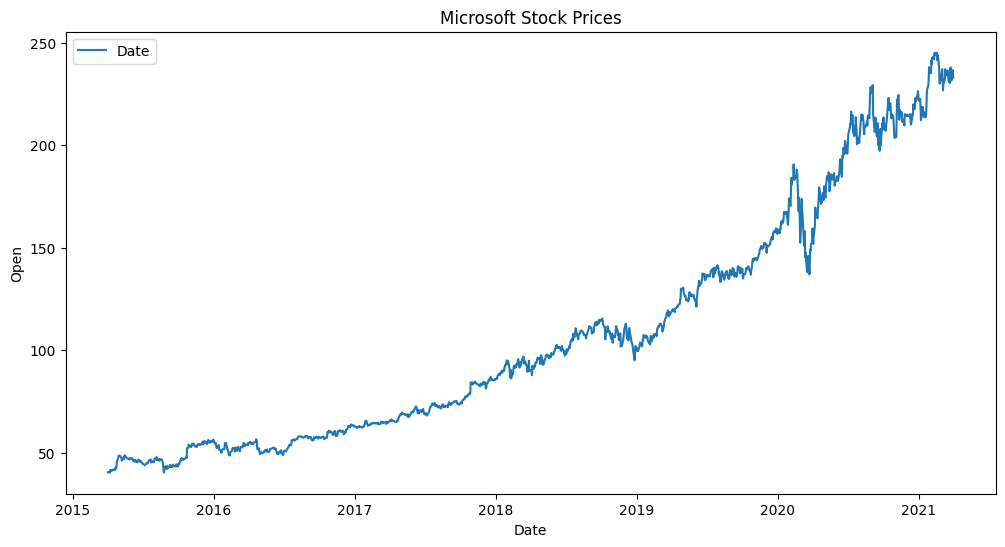

In [40]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot( df['Open'], label='Date')
plt.xlabel('Date')
plt.ylabel('Open')
plt.legend()
plt.title('Microsoft Stock Prices')
plt.show()

In [41]:
# Adding lag features to the DataFrame
for i in range(1, 13): # Creating lag features up to 5 days
	df[f'Lag_{i}'] = df['Open'].shift(i)

df

,Open,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10,Lag_11,Lag_12
Date,,,,,,,,,,,,,
2015-04-01 16:00:00,40.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-02 16:00:00,40.66,40.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-06 16:00:00,40.34,40.66,40.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-07 16:00:00,41.61,40.34,40.66,40.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-08 16:00:00,41.48,41.61,40.34,40.66,40.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25 16:00:00,235.30,237.85,237.49,230.27,231.02,232.56,236.15,236.28,234.96,234.01,234.96,237.00,232.88
2021-03-26 16:00:00,231.55,235.30,237.85,237.49,230.27,231.02,232.56,236.15,236.28,234.96,234.01,234.96,237.00
2021-03-29 16:00:00,236.59,231.55,235.30,237.85,237.49,230.27,231.02,232.56,236.15,236.28,234.96,234.01,234.96


In [42]:
# Drop rows with NaN values resulting from creating lag features
df.dropna(inplace=True)

# Split the data into training and testing sets
train_size = int(0.8 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]

# Define the input features (lag features) and target variable

y_train = train_data['Open']

y_test = test_data['Open']


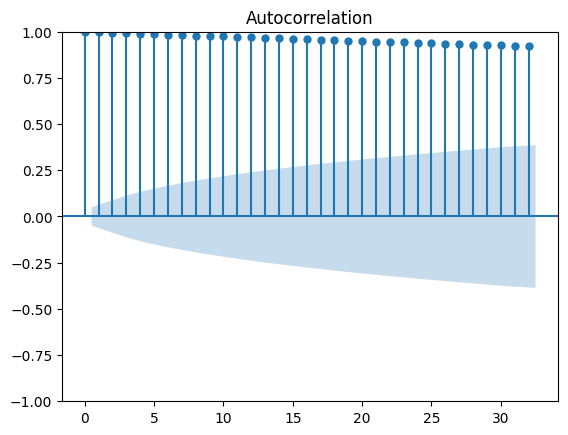

In [43]:
from statsmodels.graphics.tsaplots import plot_acf
series = df['Open']
plot_acf(series)
plt.show()

In [44]:
for i in range(1, 20):
    print(f'Autocorrelatio lag{i} : {df['Open'].corr(df['Open'].shift(i))}')

Autocorrelatio lag1 : 0.9992709343797572
Autocorrelatio lag2 : 0.9986368585327103
Autocorrelatio lag3 : 0.9981644500121788
Autocorrelatio lag4 : 0.9976830497914186
Autocorrelatio lag5 : 0.9971502322647191
Autocorrelatio lag6 : 0.9966475782654713
Autocorrelatio lag7 : 0.9961972650991003
Autocorrelatio lag8 : 0.9957946603828426
Autocorrelatio lag9 : 0.9953212306460872
Autocorrelatio lag10 : 0.994799004846223
Autocorrelatio lag11 : 0.9942912173366958
Autocorrelatio lag12 : 0.993895884568647
Autocorrelatio lag13 : 0.9935022831341448
Autocorrelatio lag14 : 0.9930659082533106
Autocorrelatio lag15 : 0.992729728676349
Autocorrelatio lag16 : 0.9924066925559388
Autocorrelatio lag17 : 0.9920872371202312
Autocorrelatio lag18 : 0.991724861275272
Autocorrelatio lag19 : 0.9913677334255263


In [45]:
# Create and train the autoregressive model
lag_order = 12 # Adjust this based on the ACF plot
ar_model = AutoReg(y_train, lags=lag_order)
ar_results = ar_model.fit()

C:\Users\71526\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [46]:
# Make predictions on the test set
y_pred = ar_results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)
#print(y_pred)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R Squared value: {r2:.2f}')

Mean Absolute Error: 13.66
Root Mean Squared Error: 16.70
R Squared value: 0.57


C:\Users\71526\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\71526\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\71526\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [47]:
df

,Open,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10,Lag_11,Lag_12
Date,,,,,,,,,,,,,
2015-04-20 16:00:00,41.73,41.67,41.95,41.76,41.80,41.40,41.63,41.25,41.48,41.61,40.34,40.66,40.60
2015-04-21 16:00:00,43.00,41.73,41.67,41.95,41.76,41.80,41.40,41.63,41.25,41.48,41.61,40.34,40.66
2015-04-22 16:00:00,42.67,43.00,41.73,41.67,41.95,41.76,41.80,41.40,41.63,41.25,41.48,41.61,40.34
2015-04-23 16:00:00,42.85,42.67,43.00,41.73,41.67,41.95,41.76,41.80,41.40,41.63,41.25,41.48,41.61
2015-04-24 16:00:00,45.66,42.85,42.67,43.00,41.73,41.67,41.95,41.76,41.80,41.40,41.63,41.25,41.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25 16:00:00,235.30,237.85,237.49,230.27,231.02,232.56,236.15,236.28,234.96,234.01,234.96,237.00,232.88
2021-03-26 16:00:00,231.55,235.30,237.85,237.49,230.27,231.02,232.56,236.15,236.28,234.96,234.01,234.96,237.00
2021-03-29 16:00:00,236.59,231.55,235.30,237.85,237.49,230.27,231.02,232.56,236.15,236.28,234.96,234.01,234.96


Text(0, 0.5, 'Open')

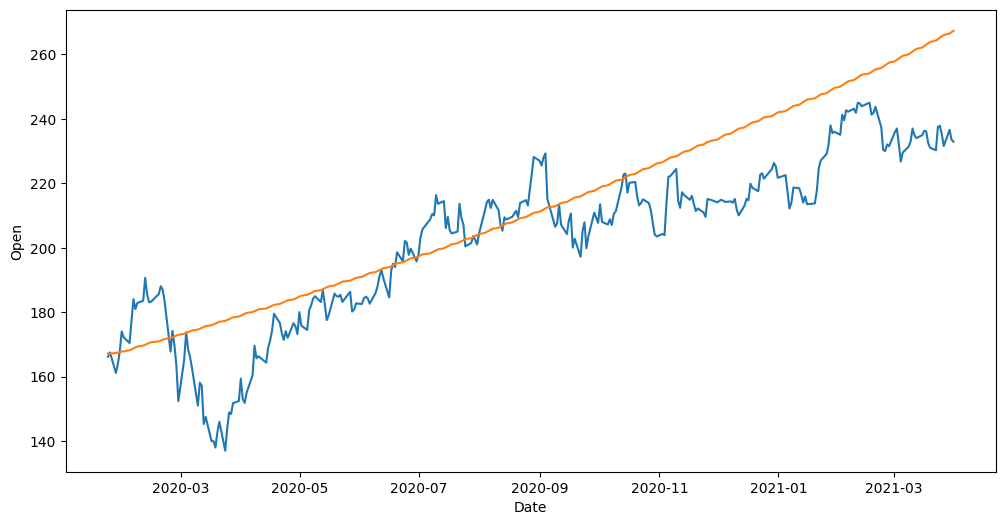

In [48]:
# plot y_test and y_pred
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Open')


In [49]:
# Fit the ARIMA(1, 1, 0) model
model = ARIMA(y_train, order=(17, 2, 14))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

C:\Users\71526\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\71526\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\71526\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\71526\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zer

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                 1199
Model:               ARIMA(17, 2, 14)   Log Likelihood               -1890.829
Date:                Tue, 30 Jul 2024   AIC                           3845.658
Time:                        14:13:07   BIC                           4008.460
Sample:                             0   HQIC                          3906.992
                               - 1199                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7986      1.052     -0.759      0.448      -2.860       1.263
ar.L2         -0.7799      1.525     -0.511      0.609      -3.768       2.209
ar.L3         -0.4680      1.639     -0.285      0.7

In [50]:
# Make predictions on the test set
y_pred = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)
#print(y_pred)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R Squared Error: {r2:.2f}')

Mean Absolute Error: 12.97
Root Mean Squared Error: 15.51
R Squared Error: 0.63


C:\Users\71526\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\71526\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


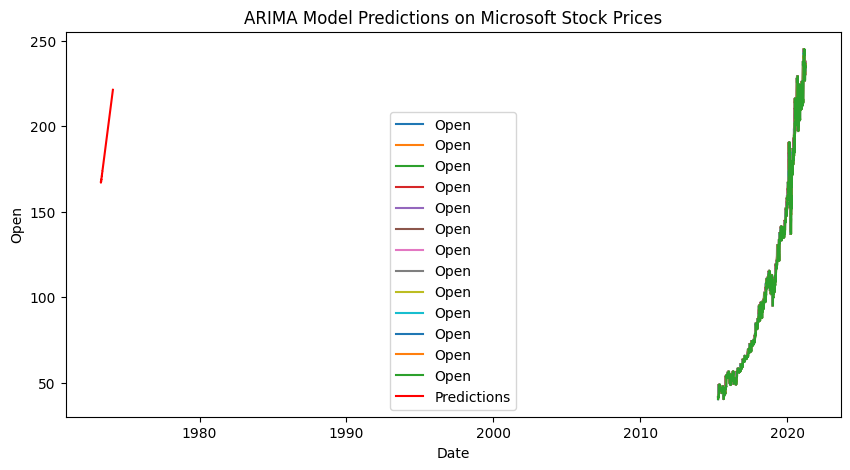

In [52]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(df, label='Open')
plt.plot(y_pred, label='Predictions', color='red')
plt.legend()
plt.title('ARIMA Model Predictions on Microsoft Stock Prices')
plt.xlabel('Date')
plt.ylabel('Open')
plt.show()